# Pyspark in colab
Reference: [使用 Google Colaboratory 跑 PySpark](https://medium.com/@chiayinchen/使用-google-colaboratory-跑-pyspark-625a07c75000)

### Install Java and Spark

In [ ]:
!apt-get -y install openjdk-8-jre-headless
!pip install pyspark

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libnss-mdns fonts-dejavu-extra fonts-ipafont-gothic fonts-ipafont-mincho
  fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jre-headless
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 27.5 MB of archives.
After this operation, 101 MB of additional disk space will be used.
Ign:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u252-b09-1~18.04
Err:1 http://security.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u252-b09-1~18.04
  404  Not Found [IP: 91.189.88.142 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jre-headless_8u252-b09-1~1

測試 Spark 是否成功安裝

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()
rdd = sc.parallelize(["Hello Spark"])
counts = rdd.flatMap(lambda line: line.split(" ")) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .collect()
print(counts)

[('Hello', 1), ('Spark', 1)]


In [ ]:
%%time
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext
spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)
sdf = sqlContext.read.format('com.databricks.spark.csv') \
    .options(header='true', inferschema='true') \
    .load('./sample_data/california_housing_train.csv')

sdf.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
|  -114.58|   33.63|    

Build datafram by Pandas

In [ ]:
%%time
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sc = SparkContext.getOrCreate()
sqlc = SQLContext(sc)
df = pd.read_csv('./sample_data/california_housing_train.csv')
sdf = sqlc.createDataFrame(df)

CPU times: user 1.05 s, sys: 4.8 ms, total: 1.05 s
Wall time: 1.1 s


In [ ]:
sdf.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
|  -114.58|   33.63|    

In [ ]:
sdf.filter(sdf['latitude'] >= 33).show(20)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
|  -114.58|   33.63|    

In [ ]:
# Find specific value by collect()[row][columns]
sdf.filter(sdf['latitude'] >= 33).collect()[0][1]

34.19

In [ ]:
sdf.select('housing_median_age').distinct().show()

+------------------+
|housing_median_age|
+------------------+
|               8.0|
|               7.0|
|              49.0|
|              29.0|
|              47.0|
|              42.0|
|              44.0|
|              35.0|
|              18.0|
|              39.0|
|               1.0|
|              34.0|
|              37.0|
|              25.0|
|              36.0|
|              41.0|
|               4.0|
|              23.0|
|              50.0|
|              45.0|
+------------------+
only showing top 20 rows



In [ ]:
tmp = sdf.groupBy('housing_median_age').count().orderBy('count').toPandas()

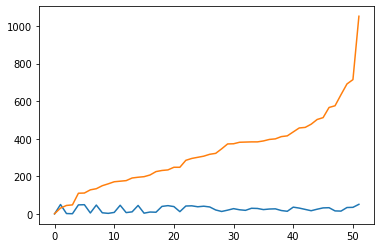

In [ ]:
plt.plot(tmp)
plt.show()